### Time Cost Data Record

In [1]:
promptTechList = ["Zero-shot", "Few-shot", "LtM", "CoT", "Few-shot-CoT"]

modelList = ['llama2-13b', 'wizardmath-13b']

time_record = {
    'DirectBooleanComputation':
    {
        'llama2-13b': (85404.7703192234, 11440.357247114182, 81372.45768857002, 78292.47083568573, 60699.45843029022),
        'wizardmath-13b': (89928.62853002548, 6486.201822280884, 164936.9865887165, 147835.66986203194, 143089.19373369217)
    },
    'IndirectBooleanComputation':
    {
        'llama2-13b': (78570.35978531837, 22193.113823890686, 78042.6229403019, 76809.05227041245, 78235.79231524467),
        'wizardmath-13b': (35575.622042417526, 4666.147635221481, 157556.39316177368, 112490.26522111893, 157831.92235469818)
    },
    'CNF':
    {
        'llama2-13b': (169086.48222875595, 42274.29893922806, 149109.09304594994, 145879.452409029, 96055.45531439781),
        'wizardmath-13b': (147074.6563346386, 54660.91827440262, 157602.9299006462, 158183.12750816345, 152733.33479976654)
    },
    'DNF':
    {
        'llama2-13b': (111566.12272953987, 24304.348639965057, 94357.50895953178, 146663.1684331894, 134839.89017009735),
        'wizardmath-13b': (147958.09635829926, 53232.295573949814, 168054.3612959385, 160650.63136982918, 169619.17963385582)
    },
    'TautologyQ':
    {
        'llama2-13b': (129684.6717095375 , 19213.256434440613, 136522.2545967102, 122103.21705317497, 128921.48261260986),
        'wizardmath-13b': (114953.94468593597, 31471.0917532444, 128283.58943891525, 146291.61704206467, 135311.9936094284)
    },
    'EquivalentQ':
    {
        'llama2-13b': (116221.54106378555, 12485.343529462814, 118916.43223023415, 107827.25003242493, 93903.98818516731),
        'wizardmath-13b': (62117.618659973145, 26167.454552412033, 115524.59270453453, 150109.7033019066, 148832.3531460762)
    },
    'SAT':
    {
        'llama2-13b': (83518.04697394371, 16354.848157405853, 94901.60887265205, 78650.41226267815, 83879.79226827621),
        'wizardmath-13b': (110556.45912075043, 49264.45660209656, 155472.89400959015, 139945.9643099308, 155942.55755877495)
    },
    'SATCount':
    {
        'llama2-13b': (70169.65203118324, 12470.228880882263, 70555.93729162216, 69875.02715444565, 60786.20793914795),
        'wizardmath-13b': (16248.723315000534, 4520.153618097305, 39748.404918432236, 52609.24841713905, 52840.893706321716)
    }
}

In [24]:
sum([sum(y) for x in list(time_record.values()) for y in list(x.values())])/3600/24/2

44.088760140495445

### Visualize for comparision

In [2]:
import matplotlib.pyplot as plt
import numpy as np
def quick_plot(problem_name : str) -> None:
    x = np.arange(len(promptTechList))
    fig, ax = plt.subplots(layout='constrained')
    # problem_name = 'TautologyQ'

    width = 0.25
    multiplier = 0
    for model in modelList:
        offset = width * multiplier
        rects = ax.bar(x + offset, [round(x / 3600) for x in time_record[problem_name][model]], width, label = model)
        ax.bar_label(rects, padding = 3);
        multiplier += 1

    ax.set_ylabel('Time / h')
    ax.set_title(f'Time Consumption on {problem_name} Problem')
    ax.set_xticks(x + width, promptTechList)
    ax.legend(loc='upper left', ncols=3)

    plt.show()

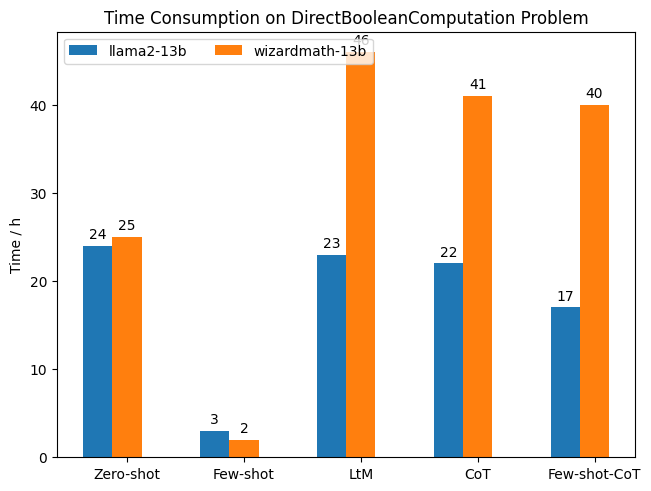

In [3]:
quick_plot('DirectBooleanComputation')